## (a) Data Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_train-2.csv')
data

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,109,331,116,5,5.0,5.0,9.38,1,0.93
1,1,346,316,98,1,1.5,2.0,7.43,0,0.49
2,2,99,332,119,4,5.0,4.5,9.24,1,0.90
3,3,210,301,104,3,3.5,4.0,8.12,1,0.68
4,4,242,317,103,2,2.5,2.0,8.15,0,0.65
...,...,...,...,...,...,...,...,...,...,...
315,315,1,337,118,4,4.5,4.5,9.65,1,0.92
316,316,376,304,101,2,2.0,2.5,7.66,0,0.38
317,317,327,299,100,3,2.0,2.0,8.02,0,0.63
318,318,379,303,98,1,2.0,2.5,7.65,0,0.56


In [3]:
data.isnull().sum()

Unnamed: 0           0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values.

In [4]:
# Creating new column (binary_label) with binary values for chance of admit based on median

data['binary_label'] = (data['Chance of Admit '] > data['Chance of Admit '].median()).astype(int)

In [5]:
# Split data into training and validation sets

from sklearn.model_selection import train_test_split

X = data.drop(columns=['Chance of Admit ', 'binary_label'])
y = data['binary_label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=1234)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(256, 9) (64, 9) (256,) (64,)


## (b) Model Initialization

In [6]:
from sklearn.svm import SVC

# Initialize SVM models with different kernels (ref: https://www.mltut.com/svm-implementation-in-python-from-scratch/)
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)

## (c) Feature Selection and Model Training

Here while training the three SVM models, I am creating three dictionaries for each model that stores accuracy and support vectors for each combination of features.

In [7]:
from sklearn.metrics import accuracy_score

# Define feature combinations
feature_combinations = np.array([['CGPA', 'SOP'],['CGPA', 'GRE Score'],['SOP', 'LOR '],['LOR ', 'GRE Score']])

########################################################################
##### Training

result_linear = [] ### linear kernel dictionary
result_rbf = []    ### rbf kernel dictionary
result_poly = []   ### polynomail kernel dictionary

for feat in feature_combinations:
    
    # Extract feature data
    X_train_features = X_train[feat]
    X_val_features = X_val[feat]
    
    # Linear Kernel
    svm_linear.fit(X_train_features, y_train)
    accuracy_linear = svm_linear.score(X_val_features, y_val)
    result_linear.append({
            'features': tuple(feat),
            'accuracy': accuracy_linear,
            'support vectors':svm_linear.support_vectors_
        })
    
    # RBF Kernel
    svm_rbf.fit(X_train_features, y_train)
    accuracy_rbf = svm_rbf.score(X_val_features, y_val)
    result_rbf.append({
            'features': tuple(feat),
            'accuracy': accuracy_rbf,
            'support vectors':svm_rbf.support_vectors_
        })
    
    # Polynomial Kernel
    svm_poly.fit(X_train_features, y_train)
    accuracy_poly = svm_poly.score(X_val_features, y_val)
    result_poly.append({
            'features': tuple(feat),
            'accuracy': accuracy_poly,
            'support vectors':svm_poly.support_vectors_
        })

## (d) Support Vectors

I stored the support vectors while training the models. Here I compute the total number of support vectors for each feature combinations.

In [8]:
## Linear kernel 

print('######################')
print('For linear kernel:')
for i in range(len(result_linear)):
    l = result_linear[i]['support vectors']
    feat = result_linear[i]['features']
    
    print(feat,':',len(l))
print(" ")

print('######################')
print('For RBF kernel:')
for i in range(len(result_rbf)):
    l = result_rbf[i]['support vectors']
    feat = result_rbf[i]['features']
    
    print(feat,':',len(l))
print(" ")

print('######################')
print('For polynomial kernel of degree 3:')
for i in range(len(result_rbf)):
    l = result_poly[i]['support vectors']
    feat = result_poly[i]['features']
    
    print(feat,':',len(l))

######################
For linear kernel:
('CGPA', 'SOP') : 97
('CGPA', 'GRE Score') : 93
('SOP', 'LOR ') : 123
('LOR ', 'GRE Score') : 94
 
######################
For RBF kernel:
('CGPA', 'SOP') : 120
('CGPA', 'GRE Score') : 224
('SOP', 'LOR ') : 121
('LOR ', 'GRE Score') : 226
 
######################
For polynomial kernel of degree 3:
('CGPA', 'SOP') : 91
('CGPA', 'GRE Score') : 132
('SOP', 'LOR ') : 120
('LOR ', 'GRE Score') : 134


## (e) Result Visualization

Ref: textbook-svm-lab(supplementary) jupyter notebook

### For linear kenel

/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


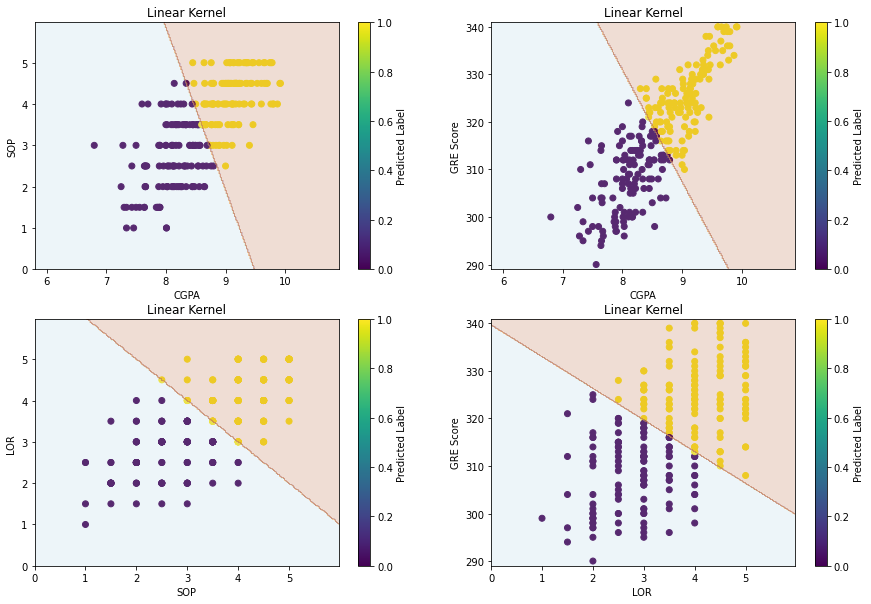

In [9]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize = (15,10))
ax = ax.ravel()

i = 0
for feat in feature_combinations:
    # Extract feature data
    X_train_features = X_train[feat]
    X_val_features = X_val[feat]

    svm_linear.fit(X_train_features, y_train)
    y_pred = svm_linear.predict(X_train_features)
    
    
    scatter = ax[i].scatter(X_train_features[feat[0]], X_train_features[feat[1]], c=y_pred)
    
    # Create and plot meshgrid and the decision boundary
    x_min, x_max = X_train_features[feat[0]].min() - 1, X_train_features[feat[0]].max() + 1
    y_min, y_max = X_train_features[feat[1]].min() - 1, X_train_features[feat[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2) 
    
    ax[i].set_xlabel(feat[0])
    ax[i].set_ylabel(feat[1])
    ax[i].set_title('Linear Kernel')
    fig.colorbar(scatter, ax=ax[i], label="Predicted Label")
    i = i+1
    

### For RBF kernel

/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


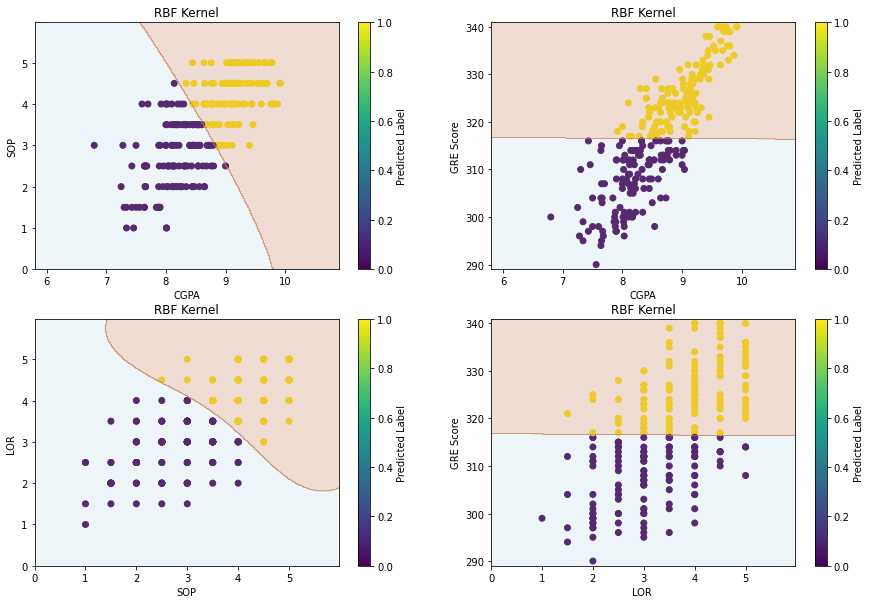

In [10]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize = (15,10))
ax = ax.ravel()

i = 0
for feat in feature_combinations:
    # Extract feature data
    X_train_features = X_train[feat]
    X_val_features = X_val[feat]

    svm_rbf.fit(X_train_features, y_train)
    y_pred = svm_rbf.predict(X_train_features)
    
    scatter = ax[i].scatter(X_train_features[feat[0]], X_train_features[feat[1]], c=y_pred)
    
    # Create and plot meshgrid and the decision boundary
    x_min, x_max = X_train_features[feat[0]].min() - 1, X_train_features[feat[0]].max() + 1
    y_min, y_max = X_train_features[feat[1]].min() - 1, X_train_features[feat[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2) 
    ax[i].set_xlabel(feat[0])
    ax[i].set_ylabel(feat[1])
    ax[i].set_title('RBF Kernel')
    fig.colorbar(scatter, ax=ax[i], label="Predicted Label")
    i = i+1

### For polynomial kernel

/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kandarp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


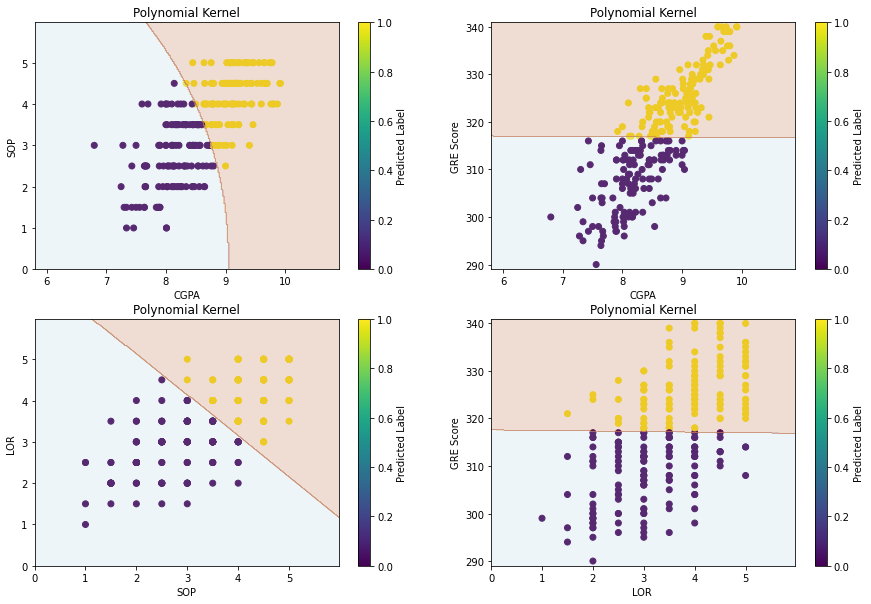

In [11]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize = (15,10))
ax = ax.ravel()

i = 0
for feat in feature_combinations:
    # Extract feature data
    X_train_features = X_train[feat]
    X_val_features = X_val[feat]

    svm_poly.fit(X_train_features, y_train)
    y_pred = svm_poly.predict(X_train_features)
    
    scatter = ax[i].scatter(X_train_features[feat[0]], X_train_features[feat[1]], c=y_pred)
    
    # Create and plot meshgrid and the decision boundary
    x_min, x_max = X_train_features[feat[0]].min() - 1, X_train_features[feat[0]].max() + 1
    y_min, y_max = X_train_features[feat[1]].min() - 1, X_train_features[feat[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)  
    
    ax[i].set_xlabel(feat[0])
    ax[i].set_ylabel(feat[1])
    ax[i].set_title('Polynomial Kernel')
    fig.colorbar(scatter, ax=ax[i], label="Predicted Label")
    i = i+1

## (f) Result Analysis

Just by looking at the plots for different kernel in the above section, for polynomial and RBF kernel, SOP and LOR features gives a well defined decision boundary with very low or without any overlap.

While model training in section (c) I have validated and stored accuracy for each feature combinations and for each kernel. Here I will compute the best performing combination with respect to accuracy.

In [12]:
## Linear kernel 

print('######################')
print('Accuracy with linear kernel:')
for i in range(len(result_linear)):
    l = result_linear[i]['accuracy']
    feat = result_linear[i]['features']
    
    print(feat,':',l)
print(" ")

print('######################')
print('Accuracy with RBF kernel:')
for i in range(len(result_rbf)):
    l = result_rbf[i]['accuracy']
    feat = result_rbf[i]['features']
    
    print(feat,':',l)
print(" ")

print('######################')
print('Accuracy with polynomial kernel of degree 3:')
for i in range(len(result_rbf)):
    l = result_poly[i]['accuracy']
    feat = result_poly[i]['features']
    
    print(feat,':',l)

######################
Accurat with linear kernel:
('CGPA', 'SOP') : 0.859375
('CGPA', 'GRE Score') : 0.875
('SOP', 'LOR ') : 0.734375
('LOR ', 'GRE Score') : 0.84375
 
######################
Accuracy with RBF kernel:
('CGPA', 'SOP') : 0.828125
('CGPA', 'GRE Score') : 0.859375
('SOP', 'LOR ') : 0.734375
('LOR ', 'GRE Score') : 0.859375
 
######################
Accuracy with polynomial kernel of degree 3:
('CGPA', 'SOP') : 0.859375
('CGPA', 'GRE Score') : 0.859375
('SOP', 'LOR ') : 0.734375
('LOR ', 'GRE Score') : 0.859375


Here best accuracy comes out to be for Linear kernel with CGPA and GRE score feature combination. I will use this model for the inference.

## (g) Inference

In [13]:
data_test = pd.read_csv('data_test-2.csv')
data_test

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0,328,295,101,2,2.5,2.0,7.86,0
1,1,325,315,104,3,3.0,2.5,8.33,0
2,2,191,324,111,5,4.5,4.0,9.16,1
3,3,49,321,110,3,3.5,5.0,8.85,1
4,4,180,307,102,3,3.0,3.0,8.27,0
...,...,...,...,...,...,...,...,...,...
75,75,138,316,100,2,1.5,3.0,8.16,1
76,76,65,325,111,3,3.0,3.5,8.70,0
77,77,125,301,106,4,2.5,3.0,8.47,0
78,78,60,311,104,2,2.0,2.0,8.30,0


In [14]:
X_test_features = data_test[['CGPA','GRE Score']]

### Predict label 

# Extract feature data
X_train_features = X_train[['CGPA','GRE Score']]

svm_rbf.fit(X_train_features, y_train)
y_pred = svm_rbf.predict(X_test_features)

In [15]:
df = pd.DataFrame({"predicted label" : y_pred})
df.to_csv("preds.csv")